# Image_Dataset_clustering_using_K-Means_AITS_A3

#### Somesh Sunariwal

## AI Tech System
## www.ai-techsystems.com

Assignment 3

In [8]:
# import all the neccessary Library

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import cv2

%matplotlib inline

## Data Preprocessing

In [9]:
path = "D:\\dataset\\Training"

In [18]:
# gather all the images from the directry and append all the images into the list 
# I took only 90 images from the each class to reduce the complexity and to reduce the time which is taken by K0-means


first =[]
for folder in os.listdir(path):
    l = 0
    for i, images in enumerate(os.listdir(path+"\\"+folder)):
        # For the simplycity i grab 1/3rd images from each class
        if i % 3 == 0:
            file_name = path+"\\"+folder+"\\"+images
            img = cv2.imread(file_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            x, y, z = img.shape
            img = img.reshape(x*y*z)
            first.append(img)
        else:
            pass

In [19]:
first_array = np.array(first)

In [20]:
## the shape is 19121,number of images,100,100,3
first_array.shape

(19121, 30000)

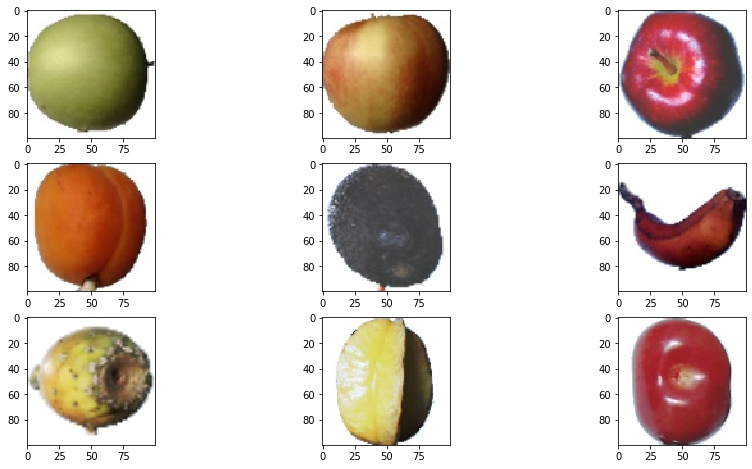

In [25]:
# Show the origanal images which is laod from the directory

plt.figure(figsize=(15,8))
for i, j in zip(range(1,10), range(1, 19121, 400)):
    plt.subplot(330+i)
    plt.imshow((first_array[j+(95*10)].reshape(100,100,3)))

# Define the K-Means Model

In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=10)

In [28]:
kmeans.fit(first_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
# get the clusters and labels of the clustered

clusters = kmeans.cluster_centers_
lable = kmeans.labels_

In [31]:
# This shows that all the images all clustered in 10 regions
# 10 different shapes along with the color 
clusters.shape

(10, 30000)

In [32]:
lable.shape

(19121,)

In [33]:
# associate images clusters with the lables to regenerate clustered image
file = clusters[lable]

In [34]:
# Result have the same no of output images but this time all images all cluster based on their shapes and colors

file.shape

(19121, 30000)

In [35]:
# Convert float data type into integer 
file_1 = np.array(file, np.int32)

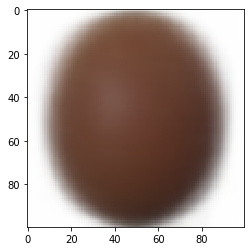

In [56]:
plt.imshow(file_1[1600].reshape(100,100,3))

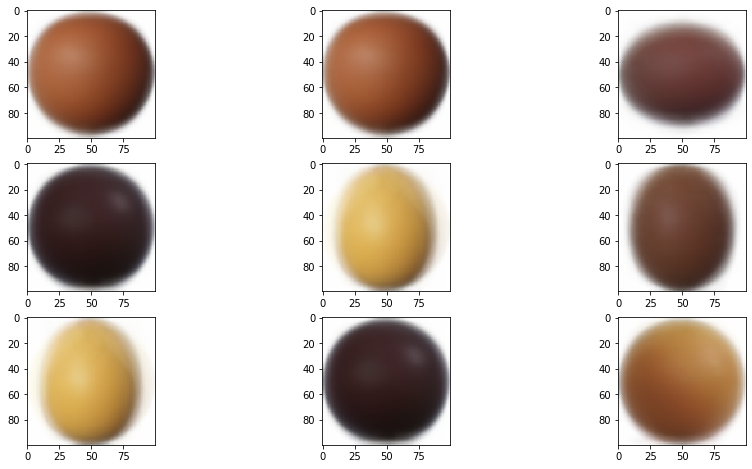

In [39]:
# Plot the result imgaes which is clustered based on the their shapes and colour.
# This is a example of some result images which i got from the clusering.
plt.figure(figsize=(15,8))
for i, j in zip(range(1,10), range(1, 19121, 400)):
    plt.subplot(330+i) 
    plt.imshow(file_1[j+(91*13)].reshape(100,100,3))

In [40]:
new = clusters.reshape(10,100,100,3)

# Result

This set of images show that all the images from the local directory are clustered based on their shape and color properties.

1. Each cluster in the set of images have a shape and color
2. Each label of kmeans clustering have the cordinate of the cluster

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


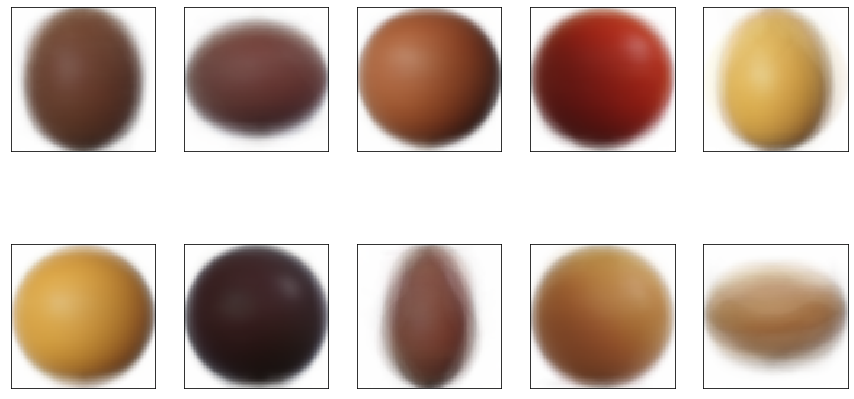

In [41]:
# These are the 10 Clusters images with differnt shapes and colour

fig, ax = plt.subplots(2, 5, figsize=(15, 8))
for axi, center in zip(ax.flat, new):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center/255, interpolation='nearest', cmap=plt.cm.binary)